In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Entorno y gestion de paquetes
!pip install spacy --quiet
#!pip spacy download es_core_news_sm --quiet
!python -m spacy download es_core_news_md --quiet
!python -m spacy download es_core_news_sm --quiet

2022-08-01 22:27:41.829050: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 42.3 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
2022-08-01 22:27:56.201473: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 12.9 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [4]:
# Carga librerias
import warnings
import glob
warnings.filterwarnings('ignore')
import spacy
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import string
remove_punct_map = dict.fromkeys(map(ord, string.punctuation))
from nltk import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
esp_stop = stopwords.words('spanish')
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [6]:
ls

gdrive/  sample_data/


In [7]:
cd /content/gdrive/MyDrive/MK/datatuits

/content/gdrive/.shortcut-targets-by-id/15ksnKTfcSsisz1PkTiFxlDeeUCKed4J6/MK/datatuits


###1. Cargar todos los archivos de texto (dolar,incertidumbre,rechazo,apruebo,inflacion) con un loop.

In [8]:
csv_files = glob.glob('*.csv')

In [9]:
import pandas as pd
list_data = []
for filename in csv_files:
    data = pd.read_csv(filename, sep ='\t')
    list_data.append(data)

#list_data

In [10]:
dfcompleto= pd.concat(list_data,ignore_index=True)

In [11]:
dfcompleto

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1551623217416228869,1551623217416228869,2022-07-25 17:39:37 UTC,2022-07-25,17:39:37,0,1543880201385418752,headengine2,Head Engine,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1551623210432593920,1551623210432593920,2022-07-25 17:39:35 UTC,2022-07-25,17:39:35,0,1458682932290330627,mustafa47564094,mustafa ABO,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1551623187372425222,1551623187372425222,2022-07-25 17:39:30 UTC,2022-07-25,17:39:30,0,1465862366944382976,arslan66994915,Arslan,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1551623181483606017,1551623181483606017,2022-07-25 17:39:28 UTC,2022-07-25,17:39:28,0,140217913,rionegrocomar,Diario Río Negro,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1551623171459129346,1551623171459129346,2022-07-25 17:39:26 UTC,2022-07-25,17:39:26,0,2696148610,fernandofersi2,Fernando,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138270,1551052834526961664,1551052834526961664,2022-07-24 03:53:07 UTC,2022-07-24,03:53:07,0,1542925788500168705,camaradaleon,León 🅰️#AprueboCrece,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
138271,1551052824552738817,1550927895899488256,2022-07-24 03:53:05 UTC,2022-07-24,03:53:05,0,182796168,firstvictory,Teresa Astudillo 🌳APRUEBO,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'LibertadSiemp13', 'name': 'C...",NaN,NaN,NaN,NaN
138272,1551052779791065089,1551052779791065089,2022-07-24 03:52:54 UTC,2022-07-24,03:52:54,0,563406744,lehnerlaura,LaurisHenne 🌳👍,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
138273,1551052773482893312,1551052773482893312,2022-07-24 03:52:53 UTC,2022-07-24,03:52:53,0,425342505,edopacheco,Eduardo Pacheco,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [12]:
#Visualizacion de columnas
dfcompleto.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [13]:
#Cantidad columnas df concatenado
len(dfcompleto.columns)

36

In [14]:
#Cantidad filas df concatenado
len(dfcompleto)

138275

In [15]:
dfcompleto=dfcompleto[['date', 'tweet']]
dfcompleto.head(20)

,date,tweet
0,2022-07-25,ALICE zaman bazlı analiz grafiği Yatırım tavsi...
1,2022-07-25,18.40 dayandı Dolar tam 10 kat
2,2022-07-25,söz yonu Mahjong oyunlardan biri. davranabilme...
3,2022-07-25,"🔴 #AHORA 📢 @sbatakis se reúne con Georgieva, ..."
4,2022-07-25,"Se viene el ""Dólar Trifásico,"" por qué se la p..."
5,2022-07-25,"@Santiago_5o5a Terrible Anti dólar sos, mufa d..."
6,2022-07-25,Bajo el dolar blue. Ahora de que hablamos de q...
7,2022-07-25,@CamiConstancio @decillisthiago_ @pablozednanr...
8,2022-07-25,El dolar da un respiro en Argentina ante expec...
9,2022-07-25,Con tan poco pueden hacer bajar el dólar...per...


In [16]:
# Limpiamos el texto
from string import digits
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º'''
dfcompleto['tweet'] = dfcompleto['tweet'].str.lower()
dfcompleto['tweet'] = dfcompleto['tweet'].replace("  ", " ")
#Remplazo de tilde para eliminar duplicidad de palabra DOLAR
dfcompleto['tweet'] = dfcompleto['tweet'].str.replace("ó","o")
dfcompleto['tweet'] = dfcompleto['tweet'].str.translate(str.maketrans('', '', string.punctuation))
dfcompleto['tweet'] = dfcompleto['tweet'].str.translate(str.maketrans('', '', punctuations1))
dfcompleto['tweet'] = dfcompleto['tweet'].str.translate(str.maketrans('', '', digits))
dfcompleto['tweet'] = dfcompleto['tweet'].str.strip()
dfcompleto = dfcompleto[dfcompleto['tweet'].str.len()>2]
dfcompleto= dfcompleto[dfcompleto['tweet'] != ""]
#df = df.reset_index()
print(dfcompleto.head(10), "\n",
      "Numero de Registros", len(dfcompleto))

         date                                              tweet
0  2022-07-25  alice zaman bazlı analiz grafiği yatırım tavsi...
1  2022-07-25                             dayandı dolar tam  kat
2  2022-07-25  söz yonu mahjong oyunlardan biri davranabilmek...
3  2022-07-25  🔴 ahora  📢 sbatakis se reúne con georgieva la ...
4  2022-07-25  se viene el dolar trifásico por qué se la pone...
5  2022-07-25  santiagooa terrible anti dolar sos mufa del au...
6  2022-07-25  bajo el dolar blue ahora de que hablamos de qu...
7  2022-07-25  camiconstancio decillisthiago pablozednanref v...
8  2022-07-25  el dolar da un respiro en argentina ante expec...
9  2022-07-25  con tan poco pueden hacer bajar el dolarpero n... 
 Numero de Registros 138275


In [17]:
# Token: palabras como unidad
toks = []
frases = []
for i in range(len(dfcompleto)):
  # Rescata la frase escrita sobre el tema
  frase = dfcompleto.iloc[i]['tweet']
  # Separa la frase por palabras
  tokens = word_tokenize(frase)
  toks.extend(tokens)

In [18]:
# Pasamos toks a dataframe
# Muestra total las palabras
df_tokens_total = pd.DataFrame(toks, columns =['token'])
print("Primera 10 palabras de las frases \n",
      df_tokens_total.head(10))
print("Total de Palabras", len(df_tokens_total))

Primera 10 palabras de las frases 
          token
0        alice
1        zaman
2        bazlı
3       analiz
4      grafiği
5      yatırım
6    tavsiyesi
7     değildir
8  kriptohaber
9   kriptopara
Total de Palabras 3202575


In [19]:
# Se eliminan las stopwords
# se pueden agreggar mas stopwords
df_tokens_clean_total = df_tokens_total[~df_tokens_total.token.isin(esp_stop)]
print(print("Primera 10 palabras de las frases limpias \n",
          df_tokens_clean_total.head(10)))
print("Total de Palabras Limpias", len(df_tokens_clean_total))

Primera 10 palabras de las frases limpias 
          token
0        alice
1        zaman
2        bazlı
3       analiz
4      grafiği
5      yatırım
6    tavsiyesi
7     değildir
8  kriptohaber
9   kriptopara
None
Total de Palabras Limpias 2021978


In [20]:
# Frecuencia de palabras
tokens_count = df_tokens_clean_total['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count = tokens_count[tokens_count.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count.head(10), "\n",
      "Numero de registros", len(tokens_count))

Frecuencia de Palabras 
            token  counts
0          dolar   53620
1        rechazo   42463
2        apruebo   39736
3  incertidumbre   16995
4             si   13773
5              q    9991
6          chile    8033
7   constitucion    6381
8      inflacion    6034
9           solo    5819 
 Numero de registros 41822


### 6. Muestre una nube de palabras total

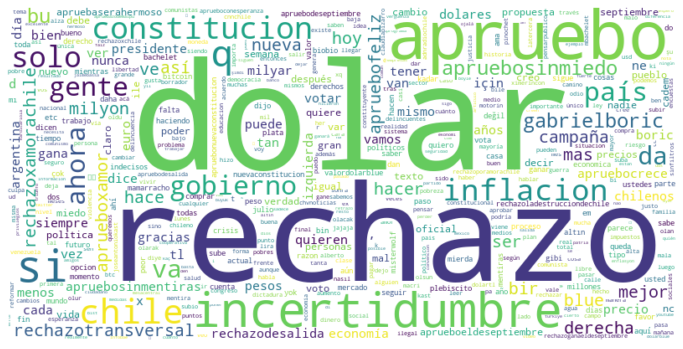

In [21]:
data = dict(zip(tokens_count['token'].tolist(), tokens_count['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
df1 = pd.read_csv('inflacion.csv', sep ='\t')
df2 = pd.read_csv('rechazo.csv', sep ='\t')
df3 = pd.read_csv('apruebo.csv', sep ='\t')
df4 = pd.read_csv('dolar.csv', sep ='\t')
df5 = pd.read_csv('incertidumbre.csv', sep ='\t')

###Cuente el numero de observaciones para cada archivo de texto.

In [23]:
print("Numero de Observaciones inflacion", len(df1))
print("Numero de Observaciones rechazo", len(df2))
print("Numero de Observaciones apruebo", len(df3))
print("Numero de Observaciones dolar", len(df4))
print("Numero de Observaciones incertidumbre", len(df5))

Numero de Observaciones inflacion 3316
Numero de Observaciones rechazo 5093
Numero de Observaciones apruebo 64754
Numero de Observaciones dolar 48365
Numero de Observaciones incertidumbre 16747


Tratamiento informacion DF1

In [24]:
df1=df1[['date', 'tweet']]
df1.head(20)

,date,tweet
0,2022-07-25,"#Biden, ¿responsable? #Opinión de Arturo Balde..."
1,2022-07-25,Situaciones desesperadas requieren medidas des...
2,2022-07-25,"No nos gusta la #inflacion, porque significa d..."
3,2022-07-25,1er. Foro Monográfico del 2022!! Comenzamos el...
4,2022-07-25,No estoy seguro si TODO es más caro...oh yo so...
5,2022-07-25,IMEFOficial: 🔴 Perspectiva Económica Trimestra...
6,2022-07-25,Precios de la gasolina Julio 2022. Europa paga...
7,2022-07-25,Para abrir cuenta https://t.co/gPHIjGA1po #Bi...
8,2022-07-25,#binanceArgentina #inflacion #Batakis #nodice...
9,2022-07-25,#DolarBlue Eviten quedarse en su casa con peso...


In [25]:
# Limpiamos el texto
from string import digits
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º'''
df1['tweet'] = df1['tweet'].str.lower()
df1['tweet'] = df1['tweet'].replace("  ", " ")


#Remplazo de tilde para eliminar duplicidad de palabra DOLAR
df1['tweet'] = df1['tweet'].str.replace("ó","o")
df1['tweet'] = df1['tweet'].str.translate(str.maketrans('', '', string.punctuation))
df1['tweet'] = df1['tweet'].str.translate(str.maketrans('', '', punctuations1))
df1['tweet'] = df1['tweet'].str.translate(str.maketrans('', '', digits))
df1['tweet'] = df1['tweet'].str.strip()
df1 = df1[df1['tweet'].str.len()>2]
df1= df1[df1['tweet'] != ""]
#df = df.reset_index()
print(df1.head(10), "\n",
      "Numero de Registros", len(df1))

         date                                              tweet
0  2022-07-25  biden responsable opinion de arturo balderas r...
1  2022-07-25  situaciones desesperadas requieren medidas des...
2  2022-07-25  no nos gusta la inflacion porque significa det...
3  2022-07-25  er foro monográfico del  comenzamos el miércol...
4  2022-07-25  no estoy seguro si todo es más carooh yo soy p...
5  2022-07-25  imefoficial 🔴 perspectiva economica trimestral...
6  2022-07-25  precios de la gasolina julio  europa paga el c...
7  2022-07-25  para abrir cuenta  httpstcogphijgapo binance b...
8  2022-07-25  binanceargentina inflacion  batakis nodicennad...
9  2022-07-25  dolarblue eviten quedarse en su casa con pesos... 
 Numero de Registros 3316


In [26]:
# Token: palabras como unidad
toks = []
frases = []
for i in range(len(df1)):
  # Rescata la frase escrita sobre el tema
  frase = df1.iloc[i]['tweet']
  # Separa la frase por palabras
  tokens = word_tokenize(frase)
  toks.extend(tokens)

In [27]:
# Pasamos toks a dataframe
# Muestra total las palabras
df_tokens_df1 = pd.DataFrame(toks, columns =['token'])
print("Primera 10 palabras de las frases \n",
      df_tokens_df1.head(10))
print("Total de Palabras", len(df_tokens_df1))

Primera 10 palabras de las frases 
          token
0        biden
1  responsable
2      opinion
3           de
4       arturo
5     balderas
6    rodríguez
7           la
8     pregunta
9           de
Total de Palabras 83509


In [28]:
# Se eliminan las stopwords
# se pueden agreggar mas stopwords
df_tokens_clean_df1 = df_tokens_df1[~df_tokens_df1.token.isin(esp_stop)]
print(print("Primera 10 palabras de las frases limpias \n",
          df_tokens_clean_df1.head(10)))
print("Total de Palabras Limpias", len(df_tokens_clean_df1))

Primera 10 palabras de las frases limpias 
              token
0            biden
1      responsable
2          opinion
4           arturo
5         balderas
6        rodríguez
8         pregunta
10        millones
12  estadunidenses
15         difícil
None
Total de Palabras Limpias 51881


In [29]:
otro = df_tokens_clean_df1['token'].count()

In [30]:
otro

51881

###Cálculo palabras frecuentes concepto inflación

In [31]:
# Frecuencia de palabras
tokens_count_df1 = df_tokens_clean_df1['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_df1 = tokens_count_df1[tokens_count_df1.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count_df1.head(10), "\n",
      "Numero de registros", len(tokens_count_df1))

Frecuencia de Palabras 
        token  counts
0  inflacion    3932
1    precios     431
2      julio     384
3      dolar     374
4   economía     286
5     méxico     278
6    primera     275
7   economia     256
8  argentina     250
9   quincena     250 
 Numero de registros 2402


In [32]:
print("std",tokens_count_df1.std())
print("std",tokens_count_df1.mean())

std counts    84.024946
dtype: float64
std counts    15.633222
dtype: float64


###Nube de palabra por concepto Inflación

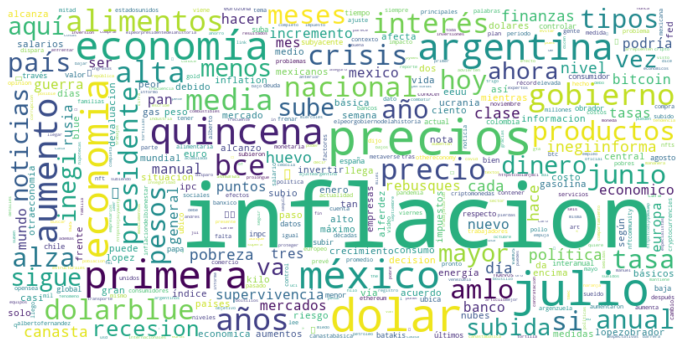

In [33]:
data = dict(zip(tokens_count_df1['token'].tolist(), tokens_count_df1['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Tratamiento informacion DF2


In [34]:
df2=df2[['date', 'tweet']]
df2.head(20)

,date,tweet
0,2022-07-25,@MaraVernicaAli1 @CHVNoticias Exactamente!!! Y...
1,2022-07-25,@biobio #Rechazo https://t.co/KEL4p9aeJc
2,2022-07-25,@PensarPublico Deja de dar jugo viejo decrepit...
3,2022-07-25,Esto corre para varios! La centro derecha hist...
4,2022-07-25,#Rechazo chao🐷💩 https://t.co/dKSQkI1iz5
5,2022-07-25,@PatriotaPatito @PiliOpina La izquierda piensa...
6,2022-07-25,"@jananeme @MuchoGustoMEGA Asi son, y uds. Los ..."
7,2022-07-25,@DonWeasDoctor @Viviluc2 @JuliaRo76844508 Los ...
8,2022-07-25,@zebravoyager La semana pasada vi #100indeciso...
9,2022-07-25,Gran Columna #Rechazo #RechazoTransversal #SiL...


In [35]:
# Limpiamos el texto
from string import digits
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º'''
df2['tweet'] = df2['tweet'].str.lower()
df2['tweet'] = df2['tweet'].replace("  ", " ")


#Remplazo de tilde para eliminar duplicidad de palabra DOLAR
df2['tweet'] = df2['tweet'].str.replace("ó","o")
df2['tweet'] = df2['tweet'].str.translate(str.maketrans('', '', string.punctuation))
df2['tweet'] = df2['tweet'].str.translate(str.maketrans('', '', punctuations1))
df2['tweet'] = df2['tweet'].str.translate(str.maketrans('', '', digits))
df2['tweet'] = df2['tweet'].str.strip()
df2 = df2[df2['tweet'].str.len()>2]
df2= df2[df2['tweet'] != ""]
#df = df.reset_index()
print(df2.head(10), "\n",
      "Numero de Registros", len(df2))

         date                                              tweet
0  2022-07-25  maravernicaali chvnoticias exactamente yo tamb...
1  2022-07-25                   biobio rechazo  httpstcokelpaejc
2  2022-07-25  pensarpublico deja de dar jugo viejo decrepito...
3  2022-07-25  esto corre para varios la centro derecha histo...
4  2022-07-25                   rechazo chao🐷💩  httpstcodksqkiiz
5  2022-07-25  patriotapatito piliopina la izquierda piensa q...
6  2022-07-25  jananeme muchogustomega asi son y uds los rost...
7  2022-07-25  donweasdoctor viviluc juliaro los zurdos ahora...
8  2022-07-25  zebravoyager la semana pasada vi indecisos y u...
9  2022-07-25  gran columna rechazo rechazotransversal silale... 
 Numero de Registros 5093


In [36]:
# Token: palabras como unidad
toks = []
frases = []
for i in range(len(df2)):
  # Rescata la frase escrita sobre el tema
  frase = df2.iloc[i]['tweet']
  # Separa la frase por palabras
  tokens = word_tokenize(frase)
  toks.extend(tokens)

In [37]:
# Pasamos toks a dataframe
# Muestra total las palabras
df_tokens_df2 = pd.DataFrame(toks, columns =['token'])
print("Primera 10 palabras de las frases \n",
      df_tokens_df2.head(10))
print("Total de Palabras", len(df_tokens_df2))

Primera 10 palabras de las frases 
             token
0  maravernicaali
1     chvnoticias
2     exactamente
3              yo
4         también
5              lo
6            creo
7            pero
8              es
9             ahí
Total de Palabras 119311


In [38]:
# Se eliminan las stopwords
# se pueden agreggar mas stopwords
df_tokens_clean_df2 = df_tokens_df2[~df_tokens_df2.token.isin(esp_stop)]
print(print("Primera 10 palabras de las frases limpias \n",
          df_tokens_clean_df2.head(10)))
print("Total de Palabras Limpias", len(df_tokens_clean_df2))

Primera 10 palabras de las frases limpias 
              token
0   maravernicaali
1      chvnoticias
2      exactamente
6             creo
9              ahí
11           padre
12           madre
14       apoderado
15           quién
17          otorga
None
Total de Palabras Limpias 69387


###Cálculo palabras frecuentes concepto Rechazo

In [39]:
# Frecuencia de palabras
tokens_count_df2 = df_tokens_clean_df2['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_df2 = tokens_count_df2[tokens_count_df2.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count_df2.head(10), "\n",
      "Numero de registros", len(tokens_count_df2))

Frecuencia de Palabras 
                 token  counts
0             rechazo    5402
1             apruebo     712
2               chile     682
3                  si     548
4                   q     471
5  rechazotransversal     465
6  rechazoxamorachile     455
7        constitucion     324
8               gente     302
9                solo     302 
 Numero de registros 2873


In [40]:
print("std",tokens_count_df2.std())
print("std",tokens_count_df2.mean())

std counts    106.581946
dtype: float64
std counts    18.20188
dtype: float64


######Nube de palabra por concepto Rechazo




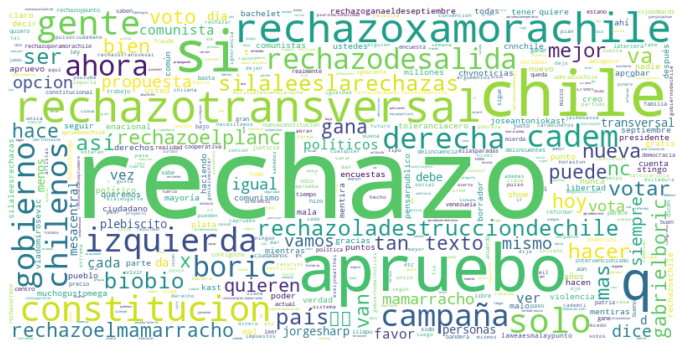

In [41]:
data = dict(zip(tokens_count_df2['token'].tolist(), tokens_count_df2['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
df3=df3[['date', 'tweet']]
df3.head(20)

,date,tweet
0,2022-07-25,@chavezpsicologo @vladomirosevic Como educació...
1,2022-07-25,"@lilyperez Si valoras mucho de la propuesta, ..."
2,2022-07-25,@MauricioMMQ75 @Camii_R_ Si la encuesta estuvi...
3,2022-07-25,@LaSerenaOnline No tienen nada que hacer más i...
4,2022-07-25,"@joseantoniokast Estimado Sr. Kast, su presenc..."
5,2022-07-25,@vladomirosevic Eso no es así. Lo sabes y así ...
6,2022-07-25,El #rechazo irá en caída libre con RN al frent...
7,2022-07-25,@gonzalowinter Hay que tener mucho winter-ya…....
8,2022-07-25,@biobio No te creo nada... #rechazo
9,2022-07-25,Es #Rechazo es de todos!!!


In [43]:
# Limpiamos el texto
from string import digits
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º'''
df3['tweet'] = df3['tweet'].str.lower()
df3['tweet'] = df3['tweet'].replace("  ", " ")


#Remplazo de tilde para eliminar duplicidad de palabra DOLAR
df3['tweet'] = df3['tweet'].str.replace("ó","o")
df3['tweet'] = df3['tweet'].str.translate(str.maketrans('', '', string.punctuation))
df3['tweet'] = df3['tweet'].str.translate(str.maketrans('', '', punctuations1))
df3['tweet'] = df3['tweet'].str.translate(str.maketrans('', '', digits))
df3['tweet'] = df3['tweet'].str.strip()
df3 = df3[df3['tweet'].str.len()>2]
df3= df3[df3['tweet'] != ""]
#df = df.reset_index()
print(df3.head(10), "\n",
      "Numero de Registros", len(df3))

         date                                              tweet
0  2022-07-25  chavezpsicologo vladomirosevic como educacion ...
1  2022-07-25  lilyperez si valoras mucho de la propuesta  pe...
2  2022-07-25  mauriciommq camiir si la encuesta estuviese co...
3  2022-07-25  laserenaonline no tienen nada que hacer más im...
4  2022-07-25  joseantoniokast estimado sr kast su presencia ...
5  2022-07-25  vladomirosevic eso no es así lo sabes y así y ...
6  2022-07-25  el rechazo irá en caída libre con rn al frente...
7  2022-07-25  gonzalowinter hay que tener mucho winterya… re...
8  2022-07-25                     biobio no te creo nada rechazo
9  2022-07-25                             es rechazo es de todos 
 Numero de Registros 64754


In [44]:
# Token: palabras como unidad
toks = []
frases = []
for i in range(len(df3)):
  # Rescata la frase escrita sobre el tema
  frase = df3.iloc[i]['tweet']
  # Separa la frase por palabras
  tokens = word_tokenize(frase)
  toks.extend(tokens)

In [45]:
# Pasamos toks a dataframe
# Muestra total las palabras
df_tokens_df3 = pd.DataFrame(toks, columns =['token'])
print("Primera 10 palabras de las frases \n",
      df_tokens_df3.head(10))
print("Total de Palabras", len(df_tokens_df3))

Primera 10 palabras de las frases 
              token
0  chavezpsicologo
1   vladomirosevic
2             como
3        educacion
4             como
5         vivienda
6                y
7           varios
8            otros
9           puntos
Total de Palabras 1414054


In [46]:
# Se eliminan las stopwords
# se pueden agreggar mas stopwords
df_tokens_clean_df3 = df_tokens_df3[~df_tokens_df3.token.isin(esp_stop)]
print(print("Primera 10 palabras de las frases limpias \n",
          df_tokens_clean_df3.head(10)))
print("Total de Palabras Limpias", len(df_tokens_clean_df3))

Primera 10 palabras de las frases limpias 
               token
0   chavezpsicologo
1    vladomirosevic
3         educacion
5          vivienda
7            varios
9            puntos
10    fundamentales
13        propuesta
16           puerta
17          abierta
None
Total de Palabras Limpias 836723


###Cálculo palabras frecuentes concepto Apruebo

In [47]:
# Frecuencia de palabras
tokens_count_df3 = df_tokens_clean_df3['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_df3 = tokens_count_df3[tokens_count_df3.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count_df3.head(10), "\n",
      "Numero de registros", len(tokens_count_df3))

Frecuencia de Palabras 
                 token  counts
0             apruebo   38323
1             rechazo   36031
2                  si    6852
3               chile    6525
4                   q    5510
5        constitucion    5483
6     apruebosinmiedo    4120
7        aprueboxamor    3685
8  rechazotransversal    3475
9        apruebofeliz    3438 
 Numero de registros 17452


In [48]:
print("std",tokens_count_df3.std())
print("std",tokens_count_df3.mean())

std counts    430.955593
dtype: float64
std counts    42.810795
dtype: float64


###Nube de palabra por concepto Apruebo

---




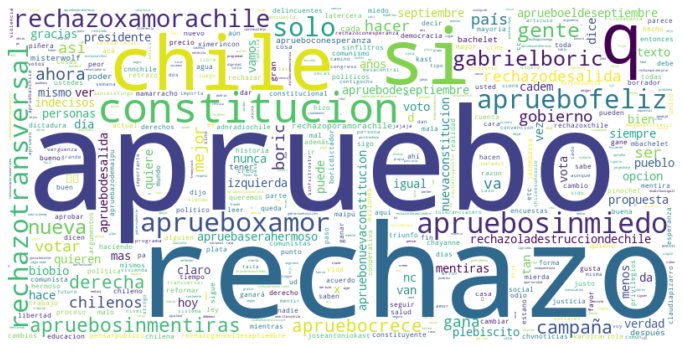

In [49]:
data = dict(zip(tokens_count_df3['token'].tolist(), tokens_count_df3['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
df4=df4[['date', 'tweet']]
df4.head(20)

,date,tweet
0,2022-07-25,ALICE zaman bazlı analiz grafiği Yatırım tavsi...
1,2022-07-25,18.40 dayandı Dolar tam 10 kat
2,2022-07-25,söz yonu Mahjong oyunlardan biri. davranabilme...
3,2022-07-25,"🔴 #AHORA 📢 @sbatakis se reúne con Georgieva, ..."
4,2022-07-25,"Se viene el ""Dólar Trifásico,"" por qué se la p..."
5,2022-07-25,"@Santiago_5o5a Terrible Anti dólar sos, mufa d..."
6,2022-07-25,Bajo el dolar blue. Ahora de que hablamos de q...
7,2022-07-25,@CamiConstancio @decillisthiago_ @pablozednanr...
8,2022-07-25,El dolar da un respiro en Argentina ante expec...
9,2022-07-25,Con tan poco pueden hacer bajar el dólar...per...


In [51]:
# Limpiamos el texto
from string import digits
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º'''
df4['tweet'] = df4['tweet'].str.lower()
df4['tweet'] = df4['tweet'].replace("  ", " ")


#Remplazo de tilde para eliminar duplicidad de palabra DOLAR
df4['tweet'] = df4['tweet'].str.replace("ó","o")
df4['tweet'] = df4['tweet'].str.translate(str.maketrans('', '', string.punctuation))
df4['tweet'] = df4['tweet'].str.translate(str.maketrans('', '', punctuations1))
df4['tweet'] = df4['tweet'].str.translate(str.maketrans('', '', digits))
df4['tweet'] = df4['tweet'].str.strip()
df4 = df4[df4['tweet'].str.len()>2]
df4= df4[df4['tweet'] != ""]
#df = df.reset_index()
print(df4.head(10), "\n",
      "Numero de Registros", len(df4))

         date                                              tweet
0  2022-07-25  alice zaman bazlı analiz grafiği yatırım tavsi...
1  2022-07-25                             dayandı dolar tam  kat
2  2022-07-25  söz yonu mahjong oyunlardan biri davranabilmek...
3  2022-07-25  🔴 ahora  📢 sbatakis se reúne con georgieva la ...
4  2022-07-25  se viene el dolar trifásico por qué se la pone...
5  2022-07-25  santiagooa terrible anti dolar sos mufa del au...
6  2022-07-25  bajo el dolar blue ahora de que hablamos de qu...
7  2022-07-25  camiconstancio decillisthiago pablozednanref v...
8  2022-07-25  el dolar da un respiro en argentina ante expec...
9  2022-07-25  con tan poco pueden hacer bajar el dolarpero n... 
 Numero de Registros 48365


In [52]:
# Token: palabras como unidad
toks = []
frases = []
for i in range(len(df4)):
  # Rescata la frase escrita sobre el tema
  frase = df4.iloc[i]['tweet']
  # Separa la frase por palabras
  tokens = word_tokenize(frase)
  toks.extend(tokens)

In [53]:
# Pasamos toks a dataframe
# Muestra total las palabras
df_tokens_df4 = pd.DataFrame(toks, columns =['token'])
print("Primera 10 palabras de las frases \n",
      df_tokens_df4.head(10))
print("Total de Palabras", len(df_tokens_df4))

Primera 10 palabras de las frases 
          token
0        alice
1        zaman
2        bazlı
3       analiz
4      grafiği
5      yatırım
6    tavsiyesi
7     değildir
8  kriptohaber
9   kriptopara
Total de Palabras 1095383


In [54]:
# Se eliminan las stopwords
# se pueden agreggar mas stopwords
df_tokens_clean_df4 = df_tokens_df4[~df_tokens_df4.token.isin(esp_stop)]
print(print("Primera 10 palabras de las frases limpias \n",
          df_tokens_clean_df4.head(10)))
print("Total de Palabras Limpias", len(df_tokens_clean_df4))

Primera 10 palabras de las frases limpias 
          token
0        alice
1        zaman
2        bazlı
3       analiz
4      grafiği
5      yatırım
6    tavsiyesi
7     değildir
8  kriptohaber
9   kriptopara
None
Total de Palabras Limpias 798404


###Cálculo palabras frecuentes concepto dolar

In [55]:
# Frecuencia de palabras
tokens_count_df4 = df_tokens_clean_df4['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_df4 = tokens_count_df4[tokens_count_df4.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count_df4.head(10), "\n",
      "Numero de registros", len(tokens_count_df4))

Frecuencia de Palabras 
     token  counts
0   dolar   52441
1      bu    4039
2     bir    4013
3      si    3553
4      ve    3218
5  milyon    3191
6    blue    2905
7      da    2830
8       q    2616
9      tl    2491 
 Numero de registros 22805


In [56]:
print("std",tokens_count_df4.std())
print("std",tokens_count_df4.mean())

std counts    361.531911
dtype: float64
std counts    28.599649
dtype: float64


###Nube de palabra por concepto Dolar

---




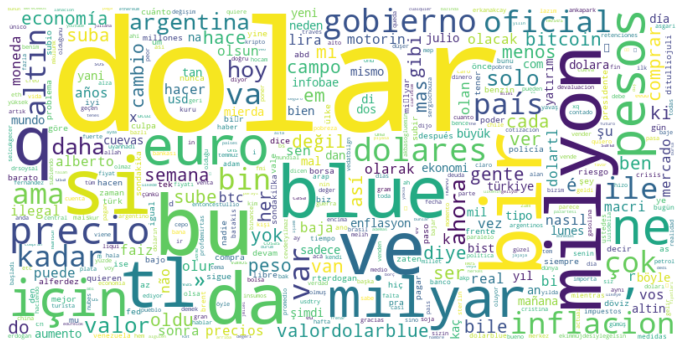

In [57]:
data = dict(zip(tokens_count_df4['token'].tolist(), tokens_count_df4['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
df5=df5[['date', 'tweet']]
df5.head(20)

,date,tweet
0,2022-07-25,@Orrego @GobiernoRM El desgobierno de boric y ...
1,2022-07-25,@PabloSilvioRol1 Son eventos que generan incer...
2,2022-07-25,@mmlagoscc Solo incertidumbre es lo que es la ...
3,2022-07-25,Abrazar la sabia incertidumbre. Eso es lo que ...
4,2022-07-25,“Tus sueños te guían durante periodos de incer...
5,2022-07-25,La horrible incertidumbre de no saber que sign...
6,2022-07-25,Esto es un delito y deben tomarse acciones! Vo...
7,2022-07-25,@claudiosavoia Me entristece mucho la situació...
8,2022-07-25,Justo lo que necesitas cuando eres madre prime...
9,2022-07-25,@PublioDeGracia @DGIpma Ya la vi. Ahora por fa...


In [59]:
# Limpiamos el texto
from string import digits
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º'''
df5['tweet'] = df5['tweet'].str.lower()
df5['tweet'] = df5['tweet'].replace("  ", " ")


#Remplazo de tilde para eliminar duplicidad de palabra DOLAR
df5['tweet'] = df5['tweet'].str.replace("ó","o")
df5['tweet'] = df5['tweet'].str.translate(str.maketrans('', '', string.punctuation))
df5['tweet'] = df5['tweet'].str.translate(str.maketrans('', '', punctuations1))
df5['tweet'] = df5['tweet'].str.translate(str.maketrans('', '', digits))
df5['tweet'] = df5['tweet'].str.strip()
df5 = df5[df5['tweet'].str.len()>2]
df5= df5[df5['tweet'] != ""]
#df = df.reset_index()
print(df5.head(10), "\n",
      "Numero de Registros", len(df5))

         date                                              tweet
0  2022-07-25  orrego gobiernorm el desgobierno de boric y la...
1  2022-07-25  pablosilviorol son eventos que generan incerti...
2  2022-07-25  mmlagoscc solo incertidumbre es lo que es la n...
3  2022-07-25  abrazar la sabia incertidumbre eso es lo que q...
4  2022-07-25  tus sueños te guían durante periodos de incert...
5  2022-07-25  la horrible incertidumbre de no saber que sign...
6  2022-07-25  esto es un delito y deben tomarse acciones voc...
7  2022-07-25  claudiosavoia me entristece mucho la situacion...
8  2022-07-25  justo lo que necesitas cuando eres madre prime...
9  2022-07-25  publiodegracia dgipma ya la vi ahora por favor... 
 Numero de Registros 16747


In [60]:
# Token: palabras como unidad
toks = []
frases = []
for i in range(len(df5)):
  # Rescata la frase escrita sobre el tema
  frase = df5.iloc[i]['tweet']
  # Separa la frase por palabras
  tokens = word_tokenize(frase)
  toks.extend(tokens)

In [61]:
# Pasamos toks a dataframe
# Muestra total las palabras
df_tokens_df5 = pd.DataFrame(toks, columns =['token'])
print("Primera 10 palabras de las frases \n",
      df_tokens_df5.head(10))
print("Total de Palabras", len(df_tokens_df5))

Primera 10 palabras de las frases 
             token
0          orrego
1      gobiernorm
2              el
3     desgobierno
4              de
5           boric
6               y
7              la
8   incertidumbre
9  constitucional
Total de Palabras 490318


In [62]:
# Se eliminan las stopwords
# se pueden agreggar mas stopwords
df_tokens_clean_df5 = df_tokens_df5[~df_tokens_df5.token.isin(esp_stop)]
print(print("Primera 10 palabras de las frases limpias \n",
          df_tokens_clean_df5.head(10)))
print("Total de Palabras Limpias", len(df_tokens_clean_df5))

Primera 10 palabras de las frases limpias 
              token
0           orrego
1       gobiernorm
3      desgobierno
5            boric
8    incertidumbre
9   constitucional
10           traen
11       problemas
14           salud
15          mental
None
Total de Palabras Limpias 265583


###Cálculo palabras frecuentes concepto incertidumbre

In [63]:
# Frecuencia de palabras
tokens_count_df5 = df_tokens_clean_df5['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_df5 = tokens_count_df5[tokens_count_df5.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count_df5.head(10), "\n",
      "Numero de registros", len(tokens_count_df5))

Frecuencia de Palabras 
            token  counts
0  incertidumbre   16719
1             si    2699
2              q    1365
3           país    1067
4           solo    1032
5        rechazo     947
6           años     875
7            ser     848
8       gobierno     809
9          ahora     785 
 Numero de registros 8553


In [64]:
print("std",tokens_count_df5.std())
print("std",tokens_count_df5.mean())

std counts    191.882402
dtype: float64
std counts    25.085233
dtype: float64


###Nube de palabra por concepto icertidumbre

---


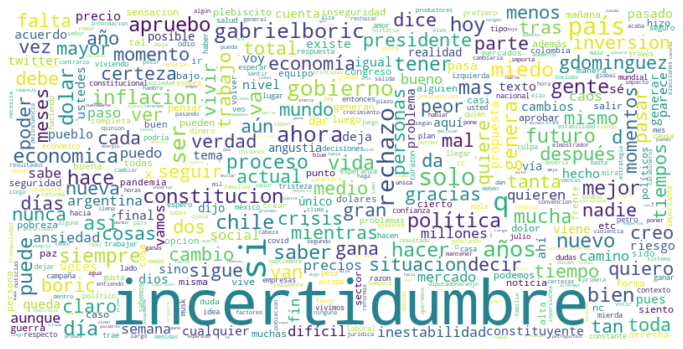

In [65]:
data = dict(zip(tokens_count_df5['token'].tolist(), tokens_count_df5['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()